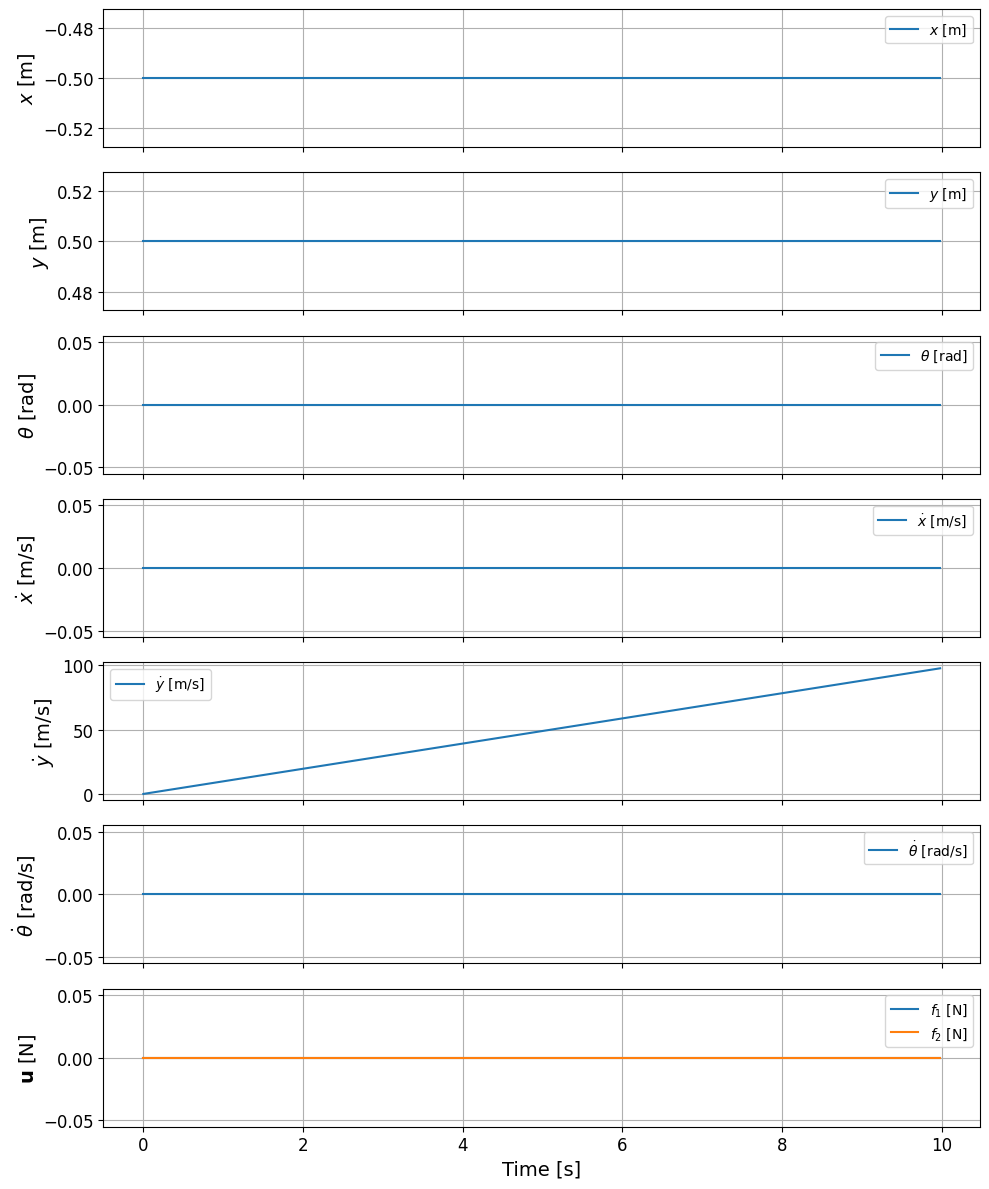

In [5]:
import numpy as np
import math

from vizualisation import plot_planar_rotor_state_and_input

# Simulation parameters.
final_time = 10
sampling_time = 0.02
g = 9.8

# System parameters
m = 1
d = 0.5
J = 0.01

# Initial state
x0, y0, theta0 = -0.5, 0.5, 0.0
dx0, dy0, dtheta0 = 0, 0, 0
theta = 0
# goal state
xf, yf, thetaf = 0, 0, 0
dxf, dyf, dthetaf = 0, 0, 0
state_ref = np.array([xf, yf, thetaf, dxf, dyf, dthetaf])

# Create vectors for time, state, and state dynamics.
t = np.arange(start=0, stop=final_time, step=sampling_time, dtype=float)
state = np.zeros([6, len(t)+1], dtype=float)
d_state = np.zeros([6, len(t)], dtype=float)
input = np.zeros([2, len(t)], dtype=float)

# Initialise arrays.
state[:,0] = np.array([x0, y0, theta0, dx0, dy0, dtheta0])

# Simulate the system.
for i, _ in enumerate(t, start=0):
    ##### Control. [Compute f1 and f2 for each thrust]. #####
    f1 = 0
    f2 = 0

    ##### System dynamics. #### 
    ##### [Fill in the nonlinear system in the array d_state]. #####
    d_state[:,i] = np.array([
        0,
        0,
        0,
        (f1+f2)*np.sin(theta)/m,
        g+(f1+f2)*np.cos(theta)/m,
        (1/J)*d*(f1-f2)
    ])
    
    # Integrate. 
    input[:,i] = np.array([f1,f2])
    state[:,i+1] = state[:,i] + d_state[:,i]*sampling_time 
    pass

# Visualise state. 
plot_planar_rotor_state_and_input(t, state[:,:-1], input)
